In [3]:
import glob
import numpy as np
from os.path import splitext
from os.path import split

In [4]:
import glob
import numpy as np
from os.path import splitext
from os.path import split
from os import listdir
import re
from shutil import copyfile

In [5]:
import h5py
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
vtkDir = "../data/raw/vtkRand/"
# vtkDir = "/Volumes/T7/anvae/vtkRand/"
# vtkList = glob.glob(vtkDir + "*.vtk")
# print(vtkList)
vtkList = listdir(vtkDir)
# print(vtkList)

In [7]:
vtkList.sort(key = lambda x: int(re.findall('([0-9]+)', x)[2]))
vtkList.sort(key = lambda x: int(re.findall('([0-9]+)', x)[1]))
vtkList.sort(key = lambda x: int(re.findall('([0-9]+)', x)[0]))
# print(vtkList)

In [6]:
# for vtk in vtkList:
#     vtkSplit = re.split('-', vtk)
#     #if subSplit[-1] == 6:
#     src = srcDir + subDir + "/eta_S00002000.vtk"
#     dst = dstDir + subSplit[1] +"-"+ subSplit[2] +"-"+ subSplit[3] + "-2000.vtk"
#     copyfile(src, dst)

In [8]:
vtkFile = vtkList[0]
vtkExt = splitext(vtkList[0])[0]
vtkSplit = re.split('_', vtkExt)
print(vtkSplit)
# vtkName = vtkSplit[0] + '_' + vtkSplit[2]
# print(re.split('.', vtkSplit[2])[0])
vtkName = vtkSplit[0] + ',' + vtkSplit[2]
print(vtkName)

['-.00023', '19', '.61037', '2000']
-.00023,.61037


In [9]:
vtkArr = np.loadtxt(vtkDir + vtkFile, skiprows=10)

with open(vtkDir + vtkFile) as file:
    foundDim = False
    while foundDim == False:
        line = file.readline() 
        if "DIMENSIONS" in line:
            foundDim = True

dims = np.asarray(line.split()[1:],dtype=np.int64)
print(dims)

arr = np.reshape(vtkArr, (dims[0],dims[1],dims[2]))
print(arr.shape)

[512 512   1]
(512, 512, 1)


In [18]:
h5 = h5py.File('../data/hdf5/vtk2D_randv1.h5', 'w')
# h5 = h5py.File('/Volumes/T7/anvae/vtk2D_randv1.h5', 'w')

In [19]:
for vtkFile in vtkList:
    # print(vtkFile)
    vtkArr = np.loadtxt(vtkDir + vtkFile, skiprows=10)

    with open(vtkDir + vtkFile) as file:
        foundDim = False
        while foundDim == False:
            line = file.readline() 
            if "DIMENSIONS" in line:
                foundDim = True

    dims = np.asarray(line.split()[1:],dtype=np.int64)
    # print(dims)

    arr = np.reshape(vtkArr, (dims[0],dims[1],dims[2]))
    # print(arr.shape)

    # vtkSplit = re.split('-', vtkFile)
    # # print(vtkSplit)
    # eta = round(int(vtkSplit[0])/20-0.3,2)
    # kappa = round(int(vtkSplit[2])/20+0.2,2)
    # seed = round(int(vtkSplit[1]))
    # # vtkName = 'eta=' + str(eta) + '_kappa=' + str(kappa)
    # vtkName = '[' + str(eta) + '-' + str(seed) + '-' + str(kappa) + ']'
    # print(vtkName)

    vtkExt = splitext(vtkFile)[0]
    vtkSplit = re.split('_', vtkExt)
    # print(vtkSplit)
    vtkName = str(vtkSplit[0]) + ',' + str(vtkSplit[2])
    print(vtkName)


    h5.create_dataset(vtkName, data=arr)

0.114490,0.343240
0.097900,0.575080
0.153550,0.548470
0.106480,0.645620
0.062330,0.721320
0.107680,0.617650
0.073850,0.606510
0.044700,0.545170
0.179540,0.526890
0.209560,0.497610
0.057140,0.348080
0.073380,0.491810
0.129540,0.619470
0.105350,0.645670
0.127830,0.361830
0.063650,0.706800
0.232530,0.659870
0.173130,0.633290
0.070390,0.690150
0.081800,0.293060
0.221730,0.563070
0.042580,0.257260
0.225810,0.426940
0.115230,0.527330
0.161650,0.298470
0.129520,0.291450
0.177960,0.458210
0.233060,0.475070
0.137760,0.579290
0.148910,0.732510
0.175930,0.450230
0.105810,0.519750
0.054740,0.477100
0.101110,0.542240
0.006770,0.292080
0.130290,0.482790
0.166490,0.660100
0.210840,0.550340
0.004590,0.623980
0.193370,0.366870
0.182860,0.362560
0.030130,0.537010
0.163460,0.409610
0.186580,0.660590
0.119960,0.607890
0.079020,0.667410
0.068860,0.448750
0.164530,0.299590
0.077520,0.727170
0.100130,0.519900
0.053370,0.552300
0.010750,0.311980
0.224510,0.343200
0.040490,0.744140
0.034590,0.313260
0.223120,0

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 37: invalid start byte

In [20]:
h5.close()

In [4]:
h5 = h5py.File('data/hdf5/vtk2D_512v2.h5', 'r')
# h5 = h5py.File('/Volumes/T7/anvae/vtk2D_randv1.h5', 'r')

In [5]:
keyList = list(h5.keys())
print(len(keyList))
print(keyList[1])

726
[0.0-1-0.35]


In [8]:
print(re.split('-', keyList[0]))
temp = re.split('-', keyList[0])
print(temp[0][1:])
print(temp[2][:-1])

['[0.0', '1', '0.25]']
0.0
0.25


In [10]:
newKeyList = []

for key in keyList:
    keySplit = re.split('-', key)
    newKey = keySplit[0][1:] + ',' + keySplit[2][:-1]

    newKeyList.append(newKey)

# np.asarray(newKeyList)
newUnq = np.unique(newKeyList).tolist()
# print(keyList[12])

print(newUnq.index(newKeyList[1]))

# match = [newUnq.index(i) for i in newKeyList]
# print(match)
# print(len(newKeyList))

2


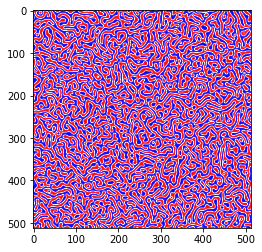

In [12]:
### return 2d image array from h5 dataset using keyList
cArr = np.array(h5.get(keyList[100]))[:,:,0]

plt.imshow(cArr, cmap='bwr')
plt.show()

### test sizing for cropped subImages
# startX=0
# startY=0
# newX=64
# newY=64
# subArr = cArr[startX:startX+newX, startY:startY+newY, 0]
# plt.imshow(subArr, cmap='bwr')


In [15]:
### this approach will grab a set number of smaller image tiles from a larger image for each group/image in an hdf5 file
### it will randomly choose an x and y pixel to serve as the starting pixel and then get desired image from there

#desired size of output images to csv
newX = 32
newY = 32

#load in the first dataset of the hdf5 file in order to get dimensions of data
cArr = np.array(h5.get(keyList[0]))

#max dimensions are total dimensions minus the size of the desired image - limits starting pixel to area that can produce desired image size
maxX = cArr.shape[0] - newX
maxY = cArr.shape[1] - newY

numImg = 10 #number of random subimages to be pulled from each hdf5 group
numKeys = len(h5.keys()) #number of groups in hdf5 file used to preallocate output array size
fullArr = np.zeros((numImg*numKeys, newX*newY)) #preallocated output array
# nameArr = [] #filled with key names used as labels for csv file
labelArr = [] #use count as index instead of name
# nameCount = 0
innerCount = 0 #initiates count for filling in preallocated array

for keyNum, key in enumerate(h5.keys()):
    # print(key)

    cArr = np.array(h5.get(key)) #get current array from hdf5 file
    # print(cArr.shape)

    #loop through image getting desired number of random tiles
    for num in np.arange(numImg):
        print(innerCount)
        startX = random.randint(0, maxX) #starting pixels for x and y position
        startY = random.randint(0, maxY)

        subArr = cArr[startX:startX+newX, startY:startY+newY, 0] #get subImage/tile of desired output size to csv
        # print(subArr.shape)
        subArr = np.reshape(subArr, (1, newX*newY)) #reformat to a single row array for csv output
        subArr = (subArr + np.abs(np.min(subArr)))/(np.abs(np.min(subArr))+np.max(subArr))
        # print(subArr.shape)
        fullArr[innerCount,:] = subArr #add to preallocated array
        # nameArr.append(key) #add the name the subimage was taken from for csv label
        # nameCountArr.append(nameCount)
        labelArr.append(newKeyList[keyNum])

        innerCount += 1
    
    # nameCount += 1

fullArr = np.asarray(fullArr)
# nameArr = np.asarray(nameArr)
labelArr = np.asarray(labelArr)
# print(fullArr.shape)
# print(nameArr.shape)

df = pd.DataFrame(data=fullArr, index=labelArr) #create pandas dataframe with array and names as the index

print(df.shape)
df.to_csv('../data/csv/vtk2D_512to32_contTest.csv', header=False, index=True) #output dataframe to csv file

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
# train, test = train_test_split(df, test_size=0.2, random_state=2, shuffle=True)
# train.to_csv('data/csv/vtk2D_128to28_train.csv', header=False, index=True) #output dataframe to csv file
# test.to_csv('data/csv/vtk2D_128to28_test.csv', header=False, index=True) #output dataframe to csv file



In [ ]:
df.to_csv('../data/csv/vtk2D_512to32_contTest.csv', header=False, index=True) #output dataframe to csv file

In [16]:
print(df)

              0         1         2         3         4         5     \
0.0,0.25  0.991177  0.989713  0.919897  0.488322  0.088480  0.025272   
0.0,0.25  0.025497  0.021810  0.024481  0.029219  0.037297  0.054954   
0.0,0.25  0.018419  0.015532  0.014816  0.016454  0.019441  0.054455   
0.0,0.25  0.269644  0.045363  0.018611  0.025652  0.081456  0.288682   
0.0,0.25  0.015427  0.013892  0.014084  0.015811  0.022757  0.074305   
...            ...       ...       ...       ...       ...       ...   
0.25,0.7  0.362646  0.110297  0.025565  0.004514  0.000000  0.003384   
0.25,0.7  0.296577  0.088645  0.026351  0.012403  0.023024  0.084197   
0.25,0.7  0.937515  0.911538  0.826213  0.696084  0.573522  0.522478   
0.25,0.7  0.948370  0.813794  0.497056  0.194017  0.067058  0.037913   
0.25,0.7  0.891281  0.936086  0.965029  0.975381  0.968633  0.943451   

              6         7         8         9     ...      1014      1015  \
0.0,0.25  0.185450  0.816295  0.979874  0.977164  ...  0.0